# HW 5

by Anjali Munasinghe, Jesse McClay, and Andrés Columna

### Table of Contents

1. [MergeSort vs InsertionSort](#Problem-1)

2. [HybridSorting](#Problem-2)

3. [Binary Search Tree vs Hash Table](#Problem-3)


# Problem 1
# MergeSort vs InsertionSort

## Hypothesis

The CLRS textbook states that insertion sort is more efficient for small n, but that the exact value of n varies between n=7 and n=50 depending on implementation and the environment its run in. This might be counter intuitive at first glance, since InsertionSort is $O(n^2)$ while Mergesort is $O(n \log{n}) $. But on second glance, it makes sense, as mergesort performs the same number of operations
regardless of how partially sorted the array we're sorting is , or how large the array is. Whereas a factor in the time required by insertionsort time is the distance an element is from its final destination. So small arrays imply small distances pushing elements into their final index regardless of where an element originally is. This means the best-case time complexity for insertion sort is $O(n)$ when we're sorting an already sorted array. And $O(nk)$ in general, where k is the most out-of-place element. So if the largest element in an array we're trying to sort in increasing order is in index=n-1, this devolves into $O(n^2)$

Despite CLRS' claims, I imagine the $n < 7$ holds for the most efficient implementation of mergesort, which is harder to code (Our version of insertionsort can't be improved in python at least). The easier version of mergesort we're planning on using obviously still has the same asymptotic complexity as any other version of mergesort, but adds some gnarly coefficients on the linear terms that might overwhelm the $n^2$ term for small n. This is due to copying of lists (i.e. mergesort(arr[:mid]) instead of just passing parameters i and mid and mid and j when splitting the left half and right half of the arrays in mergesort.

So our guess is that insertionsort will be more efficient than mergesort for $n < 60$. Mergesort will be more efficient for all $n > 60$.

## Methods

The version of python used is cPython 3.6.5 |[GCC 4.2.1 Compatible Clang 4.0.1 on darwin VM

My computer is a macbook air w/ 8gb RAM.

We used the timeit library from the python standard lib to time the functions. We use randint from the random library to create random arrays of variable length.

We create ten random arrays for each length n, ranging from array len=1 to len=300. Then we sum how long it takes each algorithm to sort the ten random arrays, and we divide it by ten to find the mean. To be clear, both algorithms sort the same permutation of a random array. The integer sizes used in the random arrays range from 1 to 1000.

#### InsertionSort implementation source: homemade

In [2]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        j = i
        val = arr[i]
        while j > 0 and arr[j - 1] > val:
            arr[j] = arr[j - 1]
            j -= 1
        arr[j] = val   

#### InsertionSort test for correctness

In [3]:
def testInsertionSort():
    
    from random import randint
    from copy import deepcopy
    
    # test for 100 random arrays of random length between 1 and 100
    for _ in range(100):
        
        arr = [randint(1, 100) for i in range(randint(1,100))]
        
        copyArr = deepcopy(arr)
        insertionSort(arr)
        
        assert(arr == sorted(arr))
        
    print("Tests Passed")
        
testInsertionSort()

Tests Passed


#### mergesort implementation, source: Andrés + merge from Python Heapq library

In [4]:
from heapq import merge
 
def mergesort(arr):
    length = len(arr)
    
    if length < 2:
        return arr
 
    mid = length // 2
    lefthalf = mergesort(arr[:mid])
    righthalf = mergesort(arr[mid:])
 
    return list(merge(lefthalf, righthalf))

#### test mergesort for correctness

In [5]:
def testMergesort():
    
    from random import randint
    from copy import deepcopy
    
    # test for 100 random arrays of random length between 1 and 100
    for _ in range(100):
        
        arr = [randint(1, 100) for i in range(randint(1,100))]
        
        copyArr = deepcopy(arr)
        
        assert(mergesort(arr) == sorted(arr))
        
    print("Mergesort Tests Passed")
        
testMergesort()

Mergesort Tests Passed


## Time mergesort vs insertion sort

In [7]:
from timeit import timeit
from random import randint
from copy import deepcopy

mergesortTimesArr = [] 
insertTimesArr = []

# time sorts from len(arr) == 1 to len(arr) == 100 
for arrlen in range(1, 200):
    
    mergeTimes  = 0
    insertTimes = 0
    
 
    # takes average of ten runs
    for _ in range(30):
        arr1 = [randint(1, 1000) for i in range(arrlen)]
        arr2 = deepcopy(arr1)
        
        mergeTimes  += timeit('mergesort(arr1)',     number=1, globals=globals())
        insertTimes += timeit('insertionSort(arr2)', number=1, globals=globals())
        
    meanMergeTime =     mergeTimes  / 30.
    meanInsertionTime = insertTimes / 30.
    
    mergesortTimesArr.append(meanMergeTime)
    insertTimesArr.append(meanInsertionTime)
    
print(mergesortTimesArr, file=open("mergeData.txt", "a"))
print(insertTimesArr, file=open("insertData.txt", "a"))

#### Code for graphing in Mathematica 11

```mathematica
MergesortTimeData = 
  ToExpression@
   StringReplace[
    Import["/Users/andres/Desktop/EECS431/HW4/mergeData.txt"], {"e" "*^", "[" -> "{", "]" -> "}"}];
InsertionTimeData = 
  ToExpression@
   StringReplace[
    Import["/Users/andres/Desktop/EECS431/HW4/insertData.txt"], {"e" \"*^", "[" -> "{", "]" -> "}"}];
ListLinePlot[{InsertionTimeData, MergesortTimeData}, 
 PlotLegends -> {"InsertionSort", "MergeSort"}, 
 AxesLabel -> {HoldForm["Len(x)"], HoldForm["Seconds"]}, 
 PlotLabel -> HoldForm["InsertionSort vs MergeSort"], 
 LabelStyle -> {14, GrayLevel[0]}]

```

## Results

the graph below indicates that mergesort becomes as fast as insertionsort around $n=95$ and clearly overtakes it at around $ n=130 $

For $n < 90$, insertionsort is consistently faster than mergesort by tens of microseconds.  For $n > 150$, the $n^2$ time complexity of insertion sort becomes apparent. And the $n \log{n}$ time complexity of mergsort is noticeably faster.

In our graph, The x-axis denotes the length of the array of integers (i.e. n). The y-axis denots the time it takes to sort the array in seconds.
The data is discrete, so it should really be a scatter plot but lines were drawn in between points so as to make it easier to read when lines cross. We used Wolfram Mathematica to graph the data.

![Image of Yaktocat](https://cdn.pbrd.co/images/HKrGrqb.png)

## Conclusions + Discussion

This is a second, clearer run of timing for n < 200.

![second run](https://cdn.pbrd.co/images/HKzrUct.png)

Upon closer inspection, the precise value at which MergeSort overtakes InsertionSort is n=103. The values are in seconds. n equals the number of elements in the array

![](https://cdn.pbrd.co/images/HKA3raz.png)

#### Using an in-place version of Mergesort

In [131]:
# using a different version in-place version of mergesort

# merge sort
def mergeSort2(arr, first, last):
    if first < last:
            middle = (first+last)//2            
            mergeSort2(arr, first, middle)
            mergeSort2(arr, middle+1, last)
            merge2(arr, first, middle, last)

def merge2(arr, first, middle, last):
    left = arr[first: middle + 1]
    right = arr[middle+1:last+1]
    
    left.append(sys.maxsize)
    right.append(sys.maxsize)
    
    i = j = 0

    for k in range (first, last+1):
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
            
def testMergeSort2():
    
    from random import randint
    from copy import deepcopy
    
    # test for 100 random arrays of random length between 1 and 100
    for _ in range(100):
        
        arr = [randint(1, 100) for i in range(randint(1,100))]
        
        copyArr = deepcopy(arr)
        mergeSort2(arr, 0, len(arr)-1)
        
        assert(arr == sorted(arr))
        
    print("Mergesort2 Tests Passed")
        
testMergeSort2()

Mergesort2 Tests Passed


In [135]:
from timeit import timeit
from random import randint
from copy import deepcopy

mergesortTimesArr = [] 
insertTimesArr = []

# time sorts from len(arr) == 1 to len(arr) == 100 
for arrlen in range(1, 100):
    
    mergeTimes  = 0
    insertTimes = 0
    
 
    # takes average of ten runs
    for _ in range(30):
        arr1 = [randint(1, 1000) for i in range(arrlen)]
        arr2 = deepcopy(arr1)
        
        mergeTimes  += timeit('mergeSort2(arr1,0,len(arr1)-1)',     number=1, globals=globals())
        insertTimes += timeit('insertionSort(arr2)', number=1, globals=globals())
        
    meanMergeTime =     mergeTimes  / 30.
    meanInsertionTime = insertTimes / 30.
    
    mergesortTimesArr.append(meanMergeTime)
    insertTimesArr.append(meanInsertionTime)
    
print(mergesortTimesArr, file=open("mergeData.txt", "a"))
print(insertTimesArr, file=open("insertData.txt", "a"))

![mahlink](https://preview.ibb.co/bzrO7f/image.png)

For the in-place mergesort, mergesort surpasses insertionSort at n=50

# Conclusion

Under the conditions tested, our implementation of insertion sort produces a faster algorithm for n < 95, while mergesort is faster for n > 130. For n between 95 and 130 the two sorting algorithms are indistinguishable.

---

# Problem 2
## Hybrid Sorting

Hypothesis: Briefly describe what results you believe you will find. It is important to write your hypothesis
before you start conducting experiments as a way of acknowledging your initial expectations. Note: you
will not lose points for your hypothesis being incorrect; in fact getting a result different from your
hypothesis will often be more exciting and more of a learning experience.


Methods: Describe step-by-step the experiments that you conduct. Provide the source code that you use,
and details about which compiler you use, how you compile it (e.g., optimization flags), and the range of
inputs that you feed into your program. Your methods should accurately reflect how you actually generated
your data such that, someone reading them can replicate your experiment.
Results: Present the data that your experiments produced. In most cases this will be a graph (as described
in each question below) and a brief explanation to make sure the reader understands the data in that graph.


Discussion: Provide a brief discussion of your data. Did anything about it surprise you? Were there any
unexpected challenges in collecting the data? This section is where you will answer specific questions
posed in the problems below.


Conclusions: Present a concise take-away for this experiment. For example, “Under the conditions tested,
data structure A produces a faster algorithm for n < 1000, while data structure B is faster for n > 1500. For
n between 1000 and 1500 the two data structures are indistinguishable.”

## Hypothesis

Given that our last experiment yielded that Mergesort surpasses InsertionSort's performance at `len(arr)=100`, I'll stick with that. I hypothesize that using insertionSort for all subarrays n < 100, and mergesort for all n >= 100 will yield the best performance.

## Methods
### InsertionSort and MergeSort from problem 1

In [140]:
from heapq import merge
 
def mergeSort(arr):
    length = len(arr)
    
    if length < 2:
        return arr
 
    mid = length // 2
    lefthalf = mergesort(arr[:mid])
    righthalf = mergesort(arr[mid:])
 
    return list(merge(lefthalf, righthalf))

def insertionSort(arr):
    for i in range(1, len(arr)):
        j = i
        val = arr[i]
        while j > 0 and arr[j - 1] > val:
            arr[j] = arr[j - 1]
            j -= 1
        arr[j] = val  
    return arr

In [229]:
from heapq import merge
 
def hybridSort(arr, k=103):
    length = len(arr)
    
    if length < k:
        return insertionSort(arr)
    
    else:

        mid = length // 2
        lefthalf = hybridSort(arr[:mid])
        righthalf = hybridSort(arr[mid:])
        return list(merge(lefthalf, righthalf))

In [227]:
%%timeit -n1 -r10 arr = deepcopy(original)

hybridSort(arr)

3.34 ms ± 1.03 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [228]:
%%timeit -n1 -r10 arr = deepcopy(original)

mergeSort(arr)

5.8 ms ± 1.52 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


## Timing the sorts

I added a parameter k to the hybridsort function that determines the cutoff when insertionSort takes over in the mergesort routine. So that for all subarrays were sorting that are less than `len(k)`, insertion sort will be used. I tested k=20,40,60,...,140. (intervals of 20).

After determining with a precision of +/- 20 what the best cutoff was, I varied the k parameter at intervals of 10, in multiple iterations of trial and error.

The way I timed the different versions of HybridSort is for every array length, 30 (probably) different random integer arrays of `len(n)` are created. A deep copy of the same array is made for each algorithm to sort, since some algorithms sort in-place and we wanna avoid feeding an already sorted array to an algorithm to sort and give us a false impression of how fast it is. `Timeit` times how long it takes to sort those 30 algorithms, each only sorted once as to avoid cache optimizations that again, obfuscate actual performance. Then the average time is taken for an individual array length. We ultimately have an array of times, where the index of an element signifys an array length, and the value at the index denotes the average time it took the algorithm to sort those 30 random arrays.  

I used the Timeit module from python. 

In [280]:
from timeit import timeit
from random import randint
from copy import deepcopy

arr20 = []
arr40 = []
arr60 = []
arr80 = []
arr100 = []
arr120 = []
arr140 = []
a160 = []

# time sorts from len(arr) == 1 to len(arr) == 100 
for arrlen in range(0, 60):
    t = 100
    t20 = 0
    t40 = 0
    t60 = 0
    t80 = 0
    t100 = 0
    t120 = 0
    t140 = 0
    
    runs = 1
    
    for _ in range(t):
    
        a20 = [randint(1, 1000) for i in range(arrlen)]
        a40 = deepcopy(a20)
        a60 = deepcopy(a20)
        a80 = deepcopy(a20)
        a100 = deepcopy(a20)
        a120 = deepcopy(a20)
        a140 = deepcopy(a20)
        a160 = deepcopy(a20)


        t100 += timeit('hybridSort(a100, 25)', number=runs, globals=globals())
        t120 += timeit('hybridSort(a120, 30)', number=runs, globals=globals())
        t140 += timeit('hybridSort(a140, 35)', number=runs, globals=globals())
    
    
    arr20.append(t20/t)
    arr40.append(t40/t)
    arr60.append(t60/t)
    arr80.append(t80/t)
    arr100.append(t100/t)
    arr120.append(t120/t)
    arr140.append(t140/t)


print(arr20, file=open("t20.txt", "a"))
print(arr40, file=open("t40.txt", "a"))
print(arr60, file=open("t60.txt", "a"))
print(arr80, file=open("t80.txt", "a"))
print(arr100, file=open("t100.txt", "a"))
print(arr120, file=open("t120.txt", "a"))
print(arr140, file=open("t140.txt", "a"))

# Results

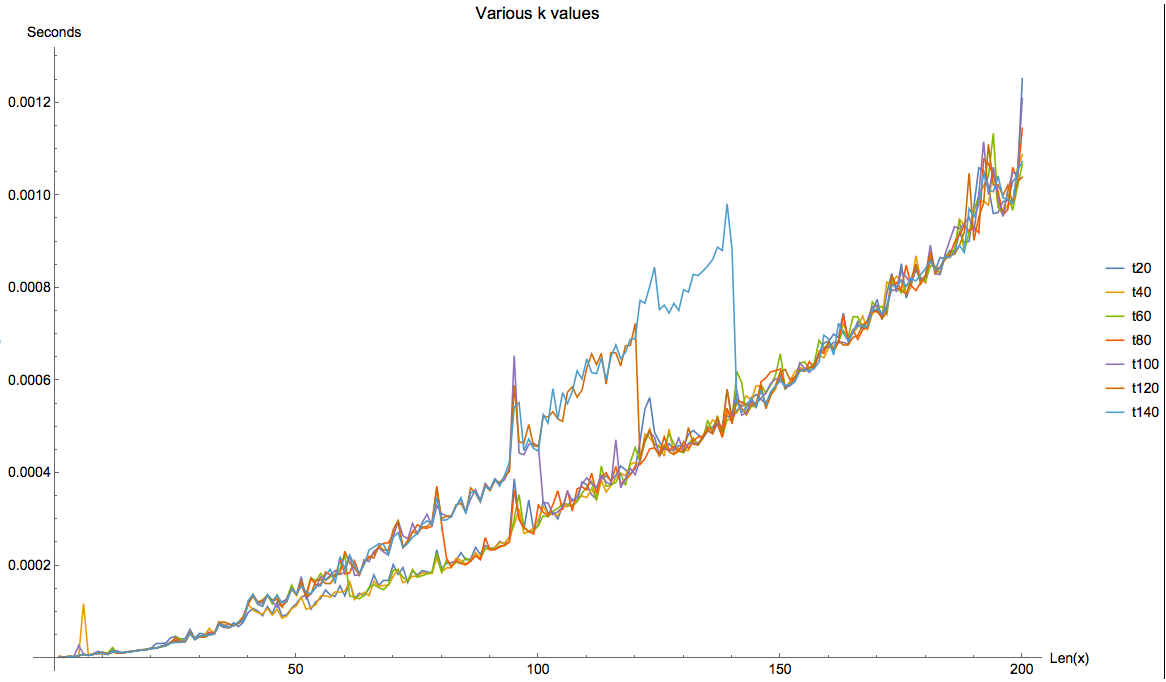

This graph denotes running hybridSorts with cutoffs of 20,40,...,140 on arrays of size range 0 to 200.

Noticeable in this graph is that HybridSort(k=140) improves drastically around `len(n)=140`, meaning that we're switching too late. This drop trend happens all the way to `Hybrid(k=60)`, so we infer from this graph that the optimal switch spot k must be < 60. So we should increase the resolution/decrease the interval size around k < 60.

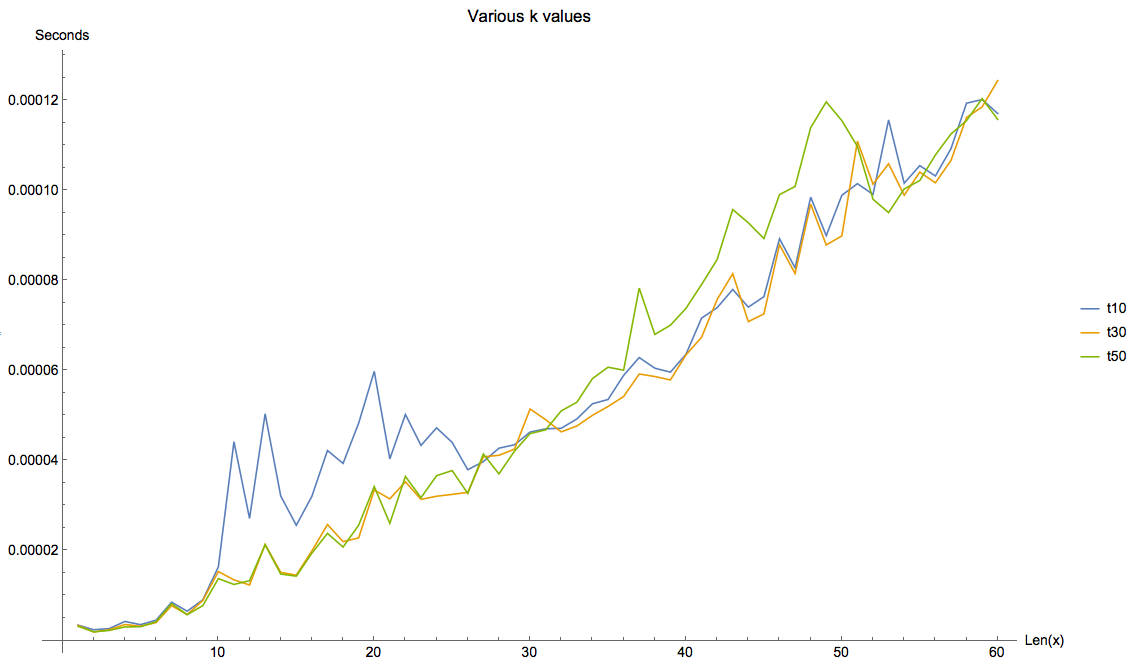

The graph plots running times of hybridSorts with cutoffs of 20,40, and 60 on arrays of size `0 < len(n) < 60`.

Notice how k=10 clearly switches to mergesort too early, and k=50 too late. So our answer must be around between 10 and 50. i.e. around 30. This contradicts the hypothesis. Really strange!

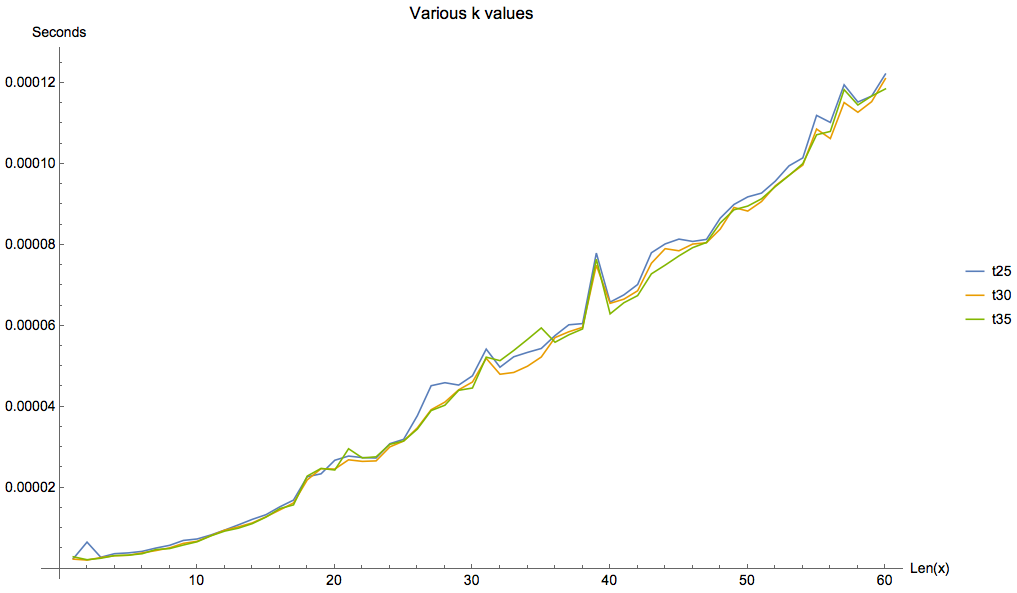

Here, the three k-values produce indistinguishable results, more or less. So I'll stop doing more trials and decide k=30 is roughly ideal.

In [281]:
from timeit import timeit
from random import randint
from copy import deepcopy

mergesortTimesArr = [] 
insertTimesArr = []
hybridTimesArr = []
sortedTimesArr = []

# time sorts from len(arr) == 1 to len(arr) == 100 
for arrlen in range(1, 250):
    
    mergeTimes  = 0
    insertTimes = 0
    hybridTimes = 0
    sortedTimes = 0
    n = 15
 
    # takes average of ten runs
    for _ in range(n):
        arr1 = [randint(1, 1000) for i in range(arrlen)]
        arr2 = deepcopy(arr1)
        arr3 = deepcopy(arr1)
        arr4 = deepcopy(arr1)
        
        mergeTimes  += timeit('mergesort(arr1)',     number=1, globals=globals())
        insertTimes += timeit('insertionSort(arr2)', number=1, globals=globals())
        hybridTimes += timeit('hybridSort(arr3, 30)', number=1, globals=globals())
        sortedTimes += timeit('sorted(arr4)', number=1, globals=globals())
        
    meanMergeTime =     mergeTimes  / n
    meanInsertionTime = insertTimes / n
    meanHybridTime = hybridTimes / n
    meanSortedTime = sortedTimes / n
    
    mergesortTimesArr.append(meanMergeTime)
    insertTimesArr.append(meanInsertionTime)
    hybridTimesArr.append(meanHybridTime)
    sortedTimesArr.append(meanSortedTime)
    
    
print(mergesortTimesArr, file=open("mergeData.txt", "a"))
print(insertTimesArr, file=open("insertData.txt", "a"))
print(hybridTimesArr, file=open("hybridData.txt", "a"))
print(sortedTimesArr, file=open("sortedData.txt", "a"))

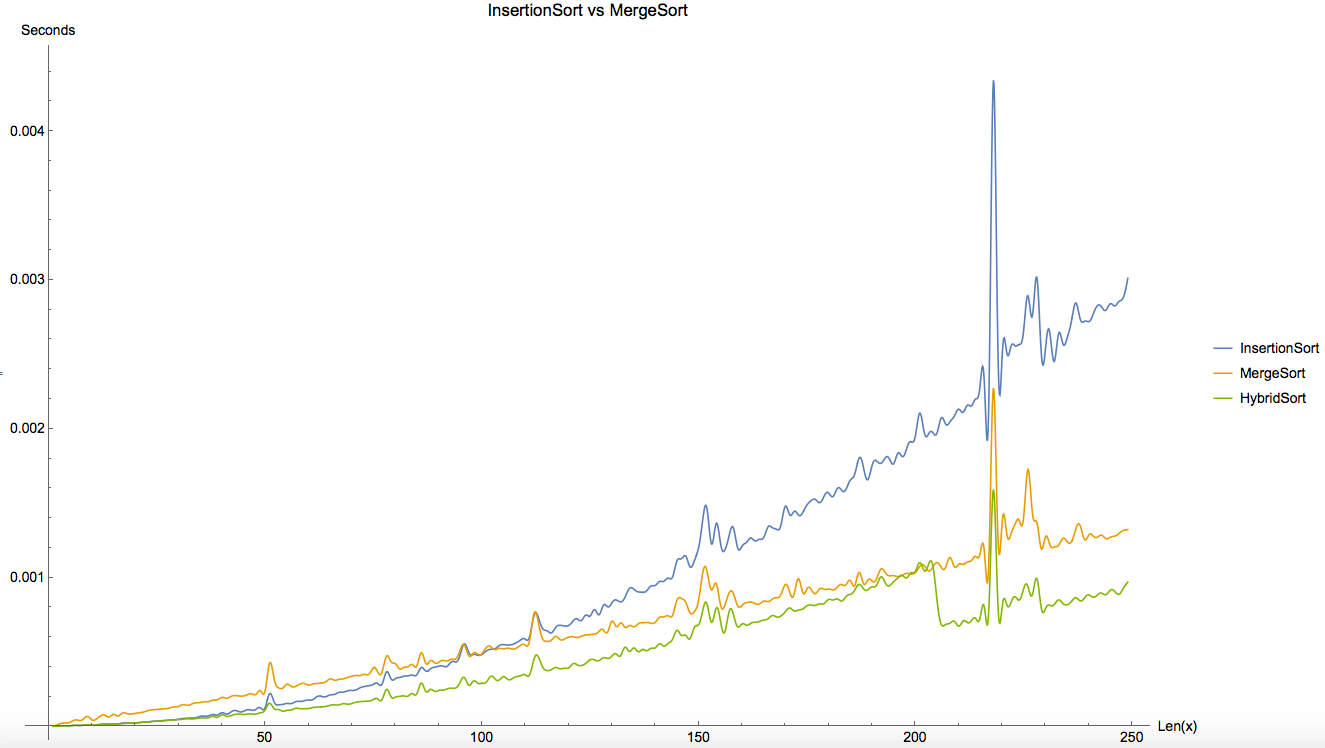

##### This graphs HybridSort(k=30) vs InsertionSort vs. MergeSort. HybridSort is clearly superior at all instances. It follows the slope of insertion sort for n < 30, and then follows the slope of MergeSort albeit merging at one point, and then matches it with a positive offset.

### Discussion

Surprisingly, the optimal switch spot is k=30. This contradicts our results from problem 1 and thus contradicts our hypothesis that k=100 would be the best switch length based on problem 1 data.

Since this is an empirical result, I have no confident way to reconcile theory with it. Maybe something is happening at the level of the compiler that could explain this? Because Python is an interpreted language, and I can't/won't read byte code, I'll never know why this is.

My attempt at an explanation: Maybe InsertionSort + MergeSort is greater than the sum of its parts- As in, maybe insertionSort is so efficient at sorting partially sorted small arrays, and mergeSort so effective dividing lists in half to get them to the small array cutoff where insertionSort is efficient, that together is better than either one by themselves would suggest.  Mergesort(n==100) is mergesort, recursively, all the way down the tree. But in HybridSort(k==25,n=100), for example, it's really calling mergesort for n=100 then twice for n=50, then four times for n=25, and then it takes advantage of insertionsort. Since halving by two so quickly gets us to the base case where insertion sort can be efficient, simply seeing were just mergesort and insertionsort lineplots meet is misleading. So maybe mergesort is so wasteful while merging small subpartitions of nearly sorted arrays that it makes the overall run time of just mergesort(at n=100) deceptively long.

A challenge in collecting data is that plotting all k values simultaneaously was too much clutter on a graph, so a time-consuming process of trial was used.

Also, the timing at each array length was a function of how many inversions the random array produced needed. So every once in a while, random spikes would show up in the graph the muddied the water, so to speak. In order to deal with this, I had to increase the number of trial runs at each n up to 50 sometimes. But this was too computationally expensive. So reading the optimal k value required a lot of zooming into graphs.

Since I know that python's built-in sorted functin uses Timsort, which is a hybrid sorting algorithm itself (albeit Quicksort + InsertionSort) I compared it to our Hybrid Algorithm just for kicks.


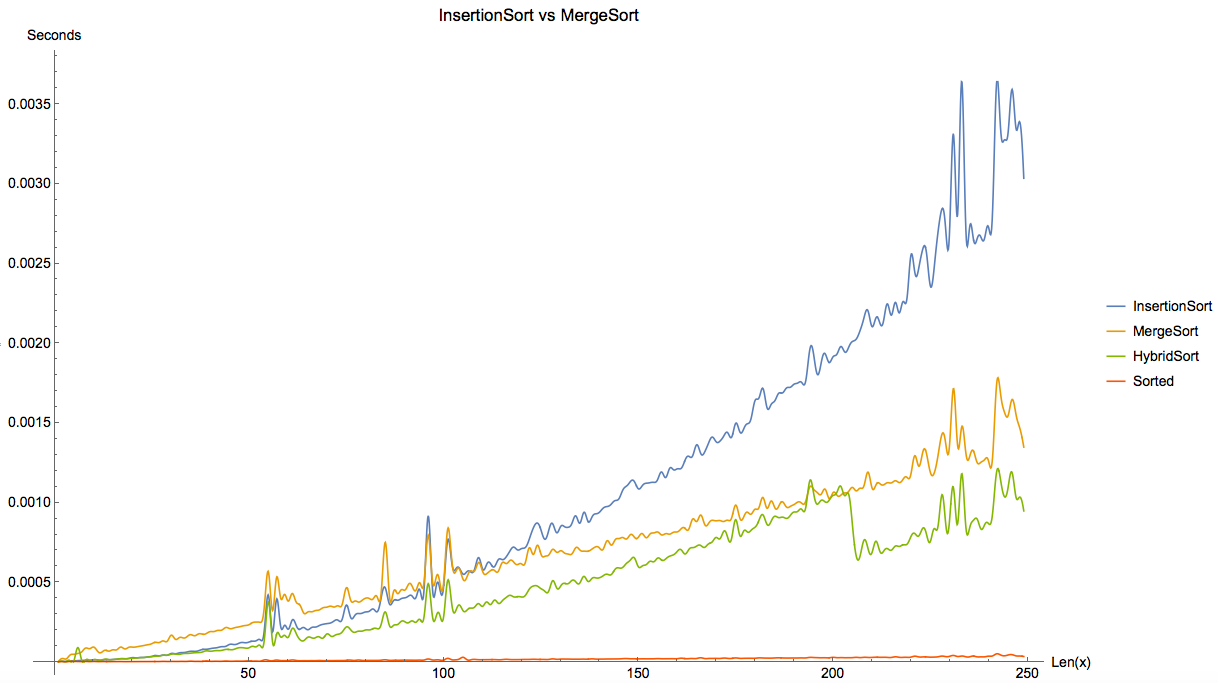

Evidently, even our hybrid algorithm sucks compared to built-in `Sorted` function.

## Conclusion

Under the conditions tested, the optimal switch length for a hybrid merge-insertion sort is, roughly 30. This contradicts our problem 1 data.


# Problem 3

## Binary Search Trees vs Hash Tables

## Hypothesis

The Time-Complexity of inserting in a balanced binary search tree is $\log{n}$, while inserting into a hashTable is $O(1)$. This is what is listed in the CPP reference pages for Multiset and Unsorted Multiset. However, I imagine a hash table has to double as it grows, so they might really mean a hash-set is an amortized $O(1)? Also, depending on how good the built-in hash function for unsorted_multiset is at preventing collisions, maybe performance will linear in the worst case. But I trust the coders of the STL to obviously not do that. 

So I'll say the hash function will make the inserting into a bst faster up until 100 insertions, and then the BST will be faster for all values greater than 100.

Methods: Describe step-by-step the experiments that you conduct. 

Provide the source code that you use,
and details about which compiler you use, how you compile it (e.g., optimization flags), and the range of
inputs that you feed into your program. 

Your methods should accurately reflect how you actually generated
your data such that, someone reading them can replicate your experiment.

## Methods

I tested multiset::insert vs unsorted_multiset::insert for inserting 2 integers, 4, 8, ..., $2^{23}$

Those are C++ implementation of Binary Search Trees and Hash-Set respectively.

The compilation flags used were : `g++ -std=c++11 -o3 main.cpp -o a.out`

I used the `<chrono>` library to time the insertions.

The times were exported to a text file. The text file was then imported into mathematica to create the graphs and tables


```cpp
//
//  main.cpp
//  CSE 431, Anjali, Jesse, Andres
//
//

#include <iostream>
#include <set>
#include <unordered_set>
#include <fstream>
#include <iomanip>
#include <chrono>
#include <math.h>

using namespace std;

int main(int argc, const char * argv[]) {
    
    
    std::unordered_multiset<int> uset;
    std::multiset<int> set;

    ofstream setFile("set.txt");
    ofstream usetFile("uset.txt");
    
    // set precision
    setFile << fixed << showpoint;
    setFile << setprecision(8);
    cout << fixed << showpoint;
    cout << setprecision(8);
    usetFile << fixed << showpoint;
    usetFile << setprecision(8);
    
    //myfile << "Writing this to a file.\n";
    auto start = chrono::steady_clock::now();
    auto end = chrono::steady_clock::now();
    
    double elapsedTime = double(chrono::duration_cast<chrono::nanoseconds>(end-start).count());
    
    long long i = 1;
    int x = 0;
    
    int exponent = 20;

    // Iterate from 1 up to exponent
    while (i <= exponent){
        
        set.clear();
        uset.clear();
        
        double setRunTime = 0;
        double usetRunTime = 0;
        
        // loop 2^i times
        for(long long j = 0; j < pow(2, i); j++){
            
            x = rand();
            
            start = chrono::steady_clock::now();
            set.insert(x);
            end = chrono::steady_clock::now();
            setRunTime += double(chrono::duration_cast<chrono::nanoseconds>(end-start).count());
            
            start = chrono::steady_clock::now();
            uset.insert(x);
            end = chrono::steady_clock::now();
            usetRunTime += double(chrono::duration_cast<chrono::nanoseconds>(end-start).count());
        }
        
        setFile << setRunTime << "\n";
        usetFile << usetRunTime << "\n";
        
        i += 1;
    }
    
    
    setFile.close();
    usetFile.close();
    
    cout << "Success!\n";
    
    return 0;
}

```

Code for Plotting

```Mathematica
setData = 
  ToExpression@
   StringSplit@Import["/Users/andres/Desktop/EECS431/set.txt"];
usetData = 
  ToExpression@
   StringSplit@Import["/Users/andres/Desktop/EECS431/uset.txt"];
ListLogLogPlot[{setData, usetData}, 
 PlotLegends -> {"Tree", "Hash Table"}, 
 AxesLabel -> {HoldForm["Number of inseertions"], 
   HoldForm["nanoseconds"]}, 
 PlotLabel -> HoldForm["Hash Table insertions vs Tree Insertions"], 
 LabelStyle -> {14, GrayLevel[0]}]
```

## Results

BST was the faster at insertion for $\leq 2^5$ insertions. Hash Table was faster for $\gt 2^5$ insertions. 

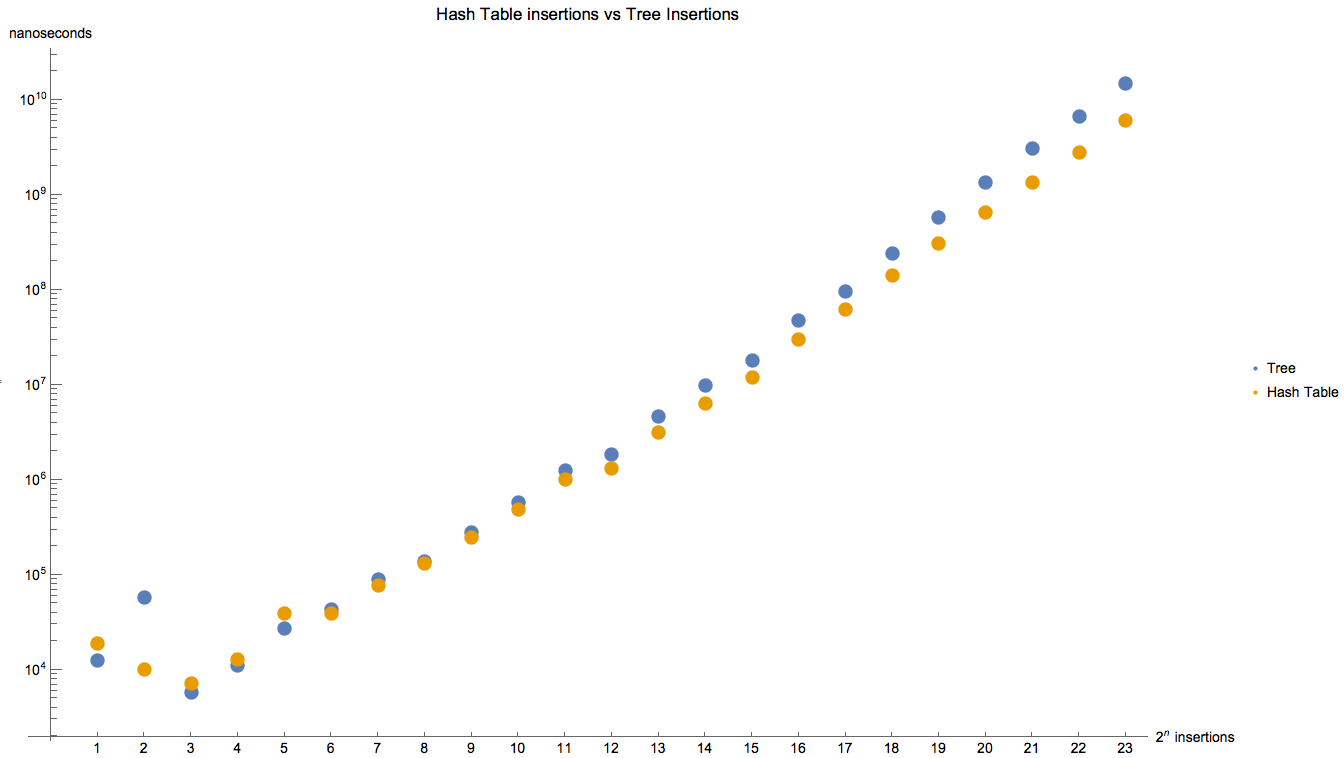

Log Log Plot of Performance Comparison of `multiset::insert` vs `unorderered_multiset::insert`, that is, inserting into a tree vs inserting into a hash table. Note that $10^{10}$ nanoseconds = 10 seconds, so we reached the three second threshold requirement listed in the HW4 spec

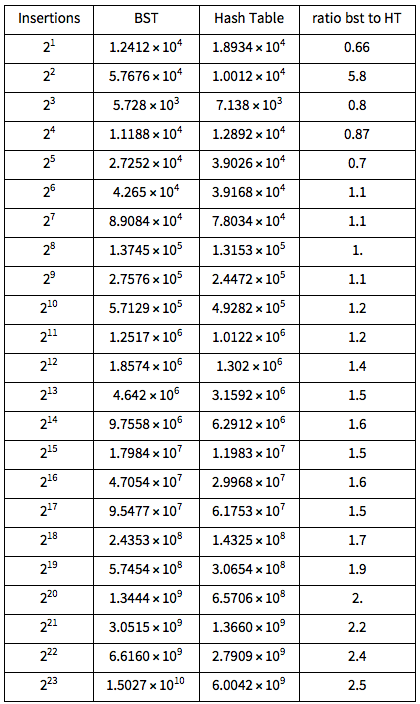

## Discussion

What's interesting is that even for $2^{23}$ insertions, the hash table was just 2.5 times faster, and not around 23 times faster that the raw big O comparison would suggest.

Another problem was that I wasn't getting any differences in performance between the two because I was unknowingly testing for too few n. Only when I cranked it up to around 2^{20} did the performance advantage of hash tables become noticeable. That's part of the reason why i used the chronos library. I was thinking the timing library provided in the homework specs wasn't precise enough to detect a difference? lol.

# Conclusion

A cpp binary search tree is more efficient at $2^5$ insertions and less. A cpp Hash Table is more efficient at 2^6 insertions and greater. 

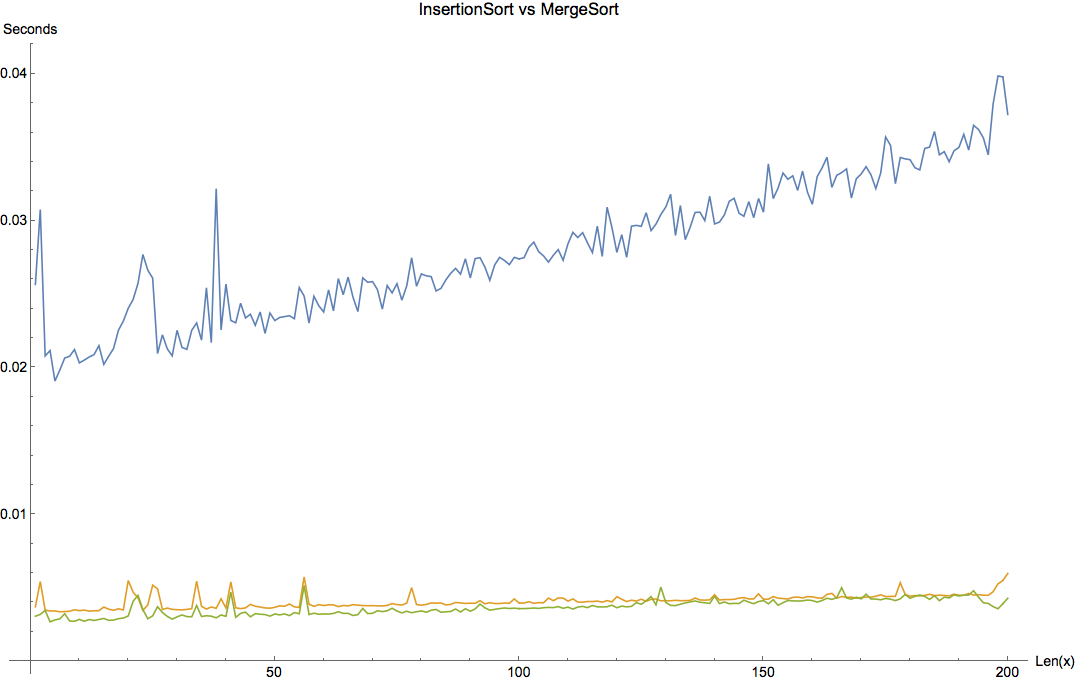